In [1]:
import os
import tensorflow as tf
import numpy as np
import import_ipynb
from dataloader import load_data
from model_arch import build_model
from hyperparameters import IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, BATCH_SIZE, EPOCHS
from keras.utils import normalize
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-09-30 12:03:32.848770: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 12:03:32.878196: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 12:03:32.878788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 12:03:33.543067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow verison: 2.12.0
importing Jupyter notebook from model_arch.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2023-09-30 12:03:34.821213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-30 12:03:34.837933: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
rgb_filepath = "../../data/images/rgb/pieces/"
mask_filepath = "../../data/images/masks/pieces/"
rgb = []
mask = []

In [5]:
rgb, mask = load_data(rgb_filepath, mask_filepath)
rgb = normalize(np.array(rgb), axis=1)
mask = np.expand_dims( (np.array(mask)) , 3 ) / 255.
print(rgb.shape)
print(mask.shape)

(1476, 320, 320, 3)
(1476, 320, 320, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(rgb, mask, test_size = 0.10, random_state = 24)

In [ ]:
model = build_model(320, 320, 3)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 320, 320, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 320, 320, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs = EPOCHS,
    validation_data=(X_test, y_test),
    shuffle=False
)

2023-09-10 11:40:17.040672: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1631846400 exceeds 10% of free system memory.
2023-09-10 11:40:21.857451: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 543948800 exceeds 10% of free system memory.


Epoch 1/2


In [ ]:
model.save("../../model_weights/UNET/unet.hdf5")

NameError: name 'model' is not defined

In [ ]:
prediction = model.predict(X_test)

5/5 [==============================] - 17s 3s/step


In [ ]:
intersection = np.logical_and(y_test, prediction)
union = np.logical_or(y_test, prediction)
iou = np.sum(intersection) / np.sum(union)
print(f"IoU score is: {iou}")

IoU score is: 0.16082130225929053


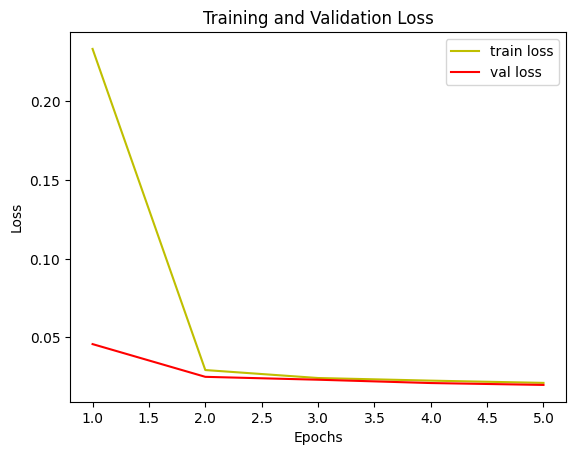

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="train loss")
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
